<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Импортируем библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

Прочитаем данные с файла и сохраним в data.

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

Посмотрим общую информацию в data

In [3]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


Наличие пропущенных данных не наблюдается.

Проверим наличие явных дубликатов.

In [4]:
data.duplicated().sum()

153

Найдено 153 явных дубликата, поэтому удалим их.

In [5]:
data = data.drop_duplicates()

Изменим тип `Возраста` и `Зарплаты` на целочисленный, так как дробных частей в значениях нет.

In [6]:
data['Возраст'] = data['Возраст'].astype(int)
data['Зарплата'] = data['Зарплата'].astype(int)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 227.2 KB


Проверим наличие аномальных значений.

<AxesSubplot:>

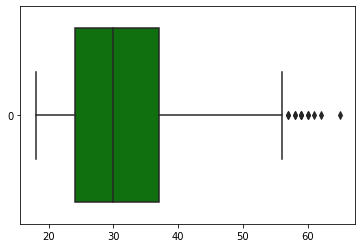

In [8]:
#Проверка возраста
sns.boxplot(data=data['Возраст'], orient='h', color='g')

Аномальных хначений нет. Выбивающиеся значения можно объяснить тем, что люди сильно пожилого возраста редко пользуются услугами страховых компаний.

<AxesSubplot:>

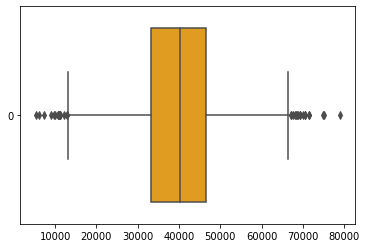

In [9]:
#Проверка зарплаты
sns.boxplot(data=data['Зарплата'], orient='h', color='orange')

Аномальных значений нет.

<AxesSubplot:>

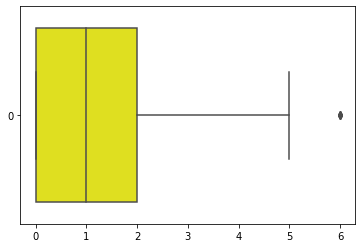

In [10]:
#Проверка членов семьи
sns.boxplot(data=data['Члены семьи'], orient='h', color='yellow')

Аномальных значений также не присутсвует. 

<AxesSubplot:>

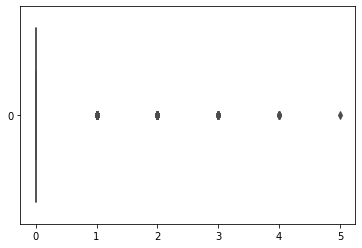

In [11]:
#Проверка страховых выплат
sns.boxplot(data=data['Страховые выплаты'], orient='h', color='red')

Аномальных значений нет. Выбивающиеся значения можно объяснить тем, что страховые выплаты как таковые редко выплачиваются, так как шанс происшествия очень мал.

**Вывод этапа**:
- Проведена проверка данных на начличие пропущенных значений и дубликатов. Пропущенных данных не обнаружено. Выявлено *153* явных дубликата (удалены из таблицы).
- Изменены типи столбцов `Возраст` и `Зарплата` на целочисленный, так как дробных частей в значениях нет.
- Проведена проверка на наличие аномальных значений. Ни в одном столбце аномальных значений не выявлено.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** не изменится

**Обоснование:**

В условии сказано, что матрица признаков умножается на обратимую матрицу, значит матрица $P$ - квадратная. Согласно заданию вектор предсказаний равен:
$$
a1 = X*w1 = ((XP)^T XP)^{-1} *(XP)^T y
$$

Раскроем транспонирование по формуле: $$(A*B)^T = B^T * A^T$$

$$
a1 = X*w1 = (X^TP^TXP)^{-1}*P^TX^T y
$$

Используем свойство аасоциативности:
$$
a1 = X*w1 = XP(P^T(X^TX)P)^{-1} *P^TX^T y
$$

$P^T$ - квадратная матрица. 
При умножении марицы на эту же транспонированную матрицу мы получим квадратную матрицу, так как размеры матриц будут следующими: $mxn * nxm = mxm$ => квадратная матрица. 

Получается, что произведение матриц $P^T(X^TX)P$ - произведение квадратных матриц => $(P^T(X^TX)P)^{-1}$ равняется $P^{-1}(X^TX)^{-1}(P^T)^{-1}$

Получаем:
$$
a1 = XPP^{-1}(X^TX)^{-1}(P^T)^{-1}* P^TX^Ty
$$

 Так как P - квадратная матрица, то $P*P^{-1}$ - единичная матрица и $(P^T)^{-1}*P^T$ также будет единичной.<br>
 Получим:<br>
$$ a1 = X(X^TX)^{-1}*X^Ty$$

Получается, что $a = a1$

**Вывод этапа**:
Проведена проверка изменичвости линейной регрессии при умножении признаков на обратимую матрицу. Результат показал, что качество не меняется.

## Алгоритм преобразования

**Алгоритм**

Для преобразования входных данных с целью защиты личных данных пользователей применим умножение на обратимую матрицу, значения для которой сгенерируем случайным образом.

1. Вводим матрицу признаков $X$ 
2. Генерация кватратной матрицы $P$ со случайными значениями, размерность матрицы - по количеству признаков.
3. Проверка матрицы $P$ на обратимость.
4. Получение матрицы преобразованных признаков 

**Обоснование**

Матрица преобразования должна быть обратимой, следовательно она должна быть квадратной и невырожденной (её детерминант должен быть отличен от нуля)

Если, количество признаков $=n$, а количество объектов $=m$, то размер матрицы преобразования должен быть $nxn$. Для обратимости матрица должна быть квадратной.

В таком случае при умножении исходной матрицы признаков размером $mxn$ на матрицу преобразования $nxn$ получим новую матрицу признаков но исходного размера $mxn$.

Такие проеобразования не меняют местами объекты в выборке, поскольку признаки одного объекта умножаются на каждый столбец матрицы преобразования, формируя объект с новыми признаками. Поэтому преобразование можно применять по частям.

In [12]:
def transform_features(features, transformation_matrix=None, random_state=None):
    n = features.shape[1]

    if transformation_matrix is None:
        np.random.seed(random_state)
        det = 0
        while det == 0:
            transformation_matrix = np.random.normal(size=(n,n))
            det = np.linalg.det(transformation_matrix)
        return (features @ transformation_matrix, transformation_matrix) 
    else:
        if (transformation_matrix.shape[0] != n or 
            transformation_matrix.shape[1] != n):
            print('Размерность матрицы преобразования', transformation_matrix.shape, 'не соответсвует размерности признаков', n)
            return None
        if np.linalg.det(transformation_matrix) == 0:
            print('Матрица преобразования необратима')
            return None
        return features @ transformation_matrix

In [13]:
transform_features(data[data.columns[:-1]])[0].sample(5, random_state=123)

,0,1,2,3
1812,26690.515074,-26884.994666,25618.841823,16714.548059
193,25238.473264,-25430.891067,24230.292878,15805.974326
4495,24806.650543,-25041.691400,23847.661357,15539.485674
552,27672.224578,-27879.768929,26563.648920,17327.428534
3027,17910.579092,-18105.895128,17236.207411,11222.453048


**Вывод этапа**:
Написан и обоснован алгоритм преобразования исходных данных, чтобы по ним было сложно восстановить персональную информацию, без ухудшения качества моделей машинного обучения.

## Проверка алгоритма

Подготовим признаки.

- Разделим выборку на обучающую и тестовую
- Сформируем преобразованные обучающую и тестовую выборки

In [14]:
futures_train, futures_test, target_train, target_test = train_test_split(
    data[data.columns[:-1]].values, data[data.columns[-1]].values, 
    test_size=0.25, random_state=123)

futures_train_new, transformation_matrix = transform_features(futures_train, random_state=123)
futures_test_new = transform_features(futures_test, transformation_matrix=transformation_matrix, random_state=123)

print('Матрица преобразования:'),
print(transformation_matrix)

Матрица преобразования:
[[-1.0856306   0.99734545  0.2829785  -1.50629471]
 [-0.57860025  1.65143654 -2.42667924 -0.42891263]
 [ 1.26593626 -0.8667404  -0.67888615 -0.09470897]
 [ 1.49138963 -0.638902   -0.44398196 -0.43435128]]


ПРоверим кк меняется $R2$ метрика.

In [15]:
def check_lr_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    print('w  =', model.coef_)
    print('R2 =', r2)

Без преобрзоаний.

In [16]:
check_lr_model(futures_train, futures_test, target_train, target_test)

w  = [ 1.19844319e-02  3.67531733e-02 -1.94830996e-08 -1.50310819e-02]
R2 = 0.4097895814653254


Умножим на обратимую матрицу.

In [17]:
mult = np.random.normal(scale=100)
shift = np.random.normal(scale=1000)

print('Умножение преобразованных признаков на', mult, 'и смещение на', shift)

check_lr_model(futures_train_new*mult+shift, futures_test_new*mult+shift, target_train, target_test);

Умножение преобразованных признаков на 220.59300827254557 и смещение на 2186.7860889737867
w  = [-1.32170114e-04 -1.07547683e-04 -1.04732268e-04 -3.16933333e-05]
R2 = 0.409789581465291


Качество регрессии не поменялось.

**Вывод этапа**:
Проведена проверка качества модели до и после преобразования. Результаты метрик не отличаются.

## Общий вывод

Итак, у нас даны данные страховой компании **«Хоть потоп»**. Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

На этапе обработки данных:
- Проведена проверка данных на начличие пропущенных значений и дубликатов. Пропущенных данных не обнаружено. Выявлено *153* явных дубликата, котрые были удалены из таблицы.
- Изменены типи столбцов `Возраст` и `Зарплата` на целочисленный, так как дробных частей в значениях нет.
- Проведена проверка на наличие аномальных значений. Ни в одном столбце аномальных значений не выявлено.

Далее проведена проверка изменичвости линейной регрессии при умножении признаков на обратимую матрицу. Результат показал, что качество не меняется.

Следующим этапом написан и обоснован алгоритм преобразования исходных данных, чтобы по ним было сложно восстановить персональную информацию, без ухудшения качества моделей машинного обучения. И проведена проверка качества модели до и после преобразования. **R2** до преобразования = 0.4097895814653254, после = 0.409789581465291. Как видно результат не отличается.